In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Build a Text Cleaning Pipeline

In [ ]:
def text_cleaning_pipeline(dataset, rule="lemmatize"):
    """
    Clean the input text:
    - Lowercase
    - Remove URLs
    - Remove emojis
    - Remove unwanted characters
    - Remove stopwords
    - Lemmatize or stem
    """
    # Convert to lowercase
    data = dataset.lower()

    # Remove URLs
    data = re.sub(r"http\S+|www\S+|https\S+", '', data, flags=re.MULTILINE)

    # Remove emojis
    data = re.sub(r"[^\x00-\x7F]+", '', data)

    # Remove unwanted characters (keep only letters and spaces)
    data = re.sub(r"[^a-z\s]", '', data)

    # Create tokens
    tokens = data.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization or Stemming
    if rule == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif rule == "stem":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        print("Pick between 'lemmatize' or 'stem'")

    return " ".join(tokens)

# Text Classification using Machine Learning Models


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### **1. Load the Dataset**
Load the dataset named "trump_tweet_sentiment_analysis.csv" using pandas. Ensure the dataset contains at least two columns: "text" and "label".

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI-Ml/workshop/workshop8/trum_tweet_sentiment_analysis.csv")

In [ ]:
df.head()

,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0


In [ ]:
print(df['Sentiment'].value_counts())
print(df['Sentiment'].unique())  # Check unique values (e.g., 0/1, or other labels)

Sentiment
0    1244211
1     605912
Name: count, dtype: int64
[0 1]


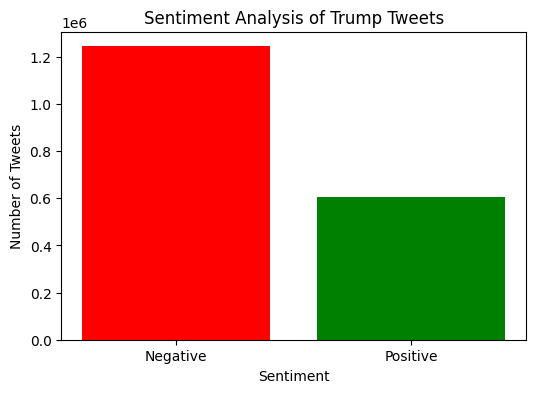

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate sentiment counts
sentiment_counts = df['Sentiment'].value_counts()

# Create the plot
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green'])  # Fixed colors
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Trump Tweets')

# Adjust x-axis labels based on actual data
plt.xticks(sentiment_counts.index, ['Negative', 'Positive'])  # Update if your data uses different labels
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate classes
df_neg = df[df['Sentiment'] == 0]
df_pos = df[df['Sentiment'] == 1]

# Downsample negative class to match positive
df_neg_downsampled = resample(df_neg, replace=False, n_samples=len(df_pos), random_state=42)

# Combine and shuffle
balanced_df = pd.concat([df_neg_downsampled, df_pos]).sample(frac=1, random_state=42)

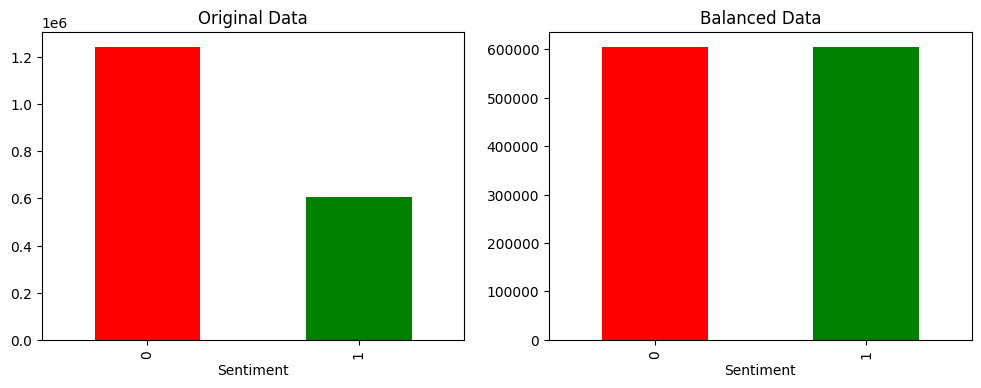

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Sentiment'].value_counts().plot(kind='bar', title='Original Data', color=['red', 'green'])

plt.subplot(1, 2, 2)
balanced_df['Sentiment'].value_counts().plot(kind='bar', title='Balanced Data', color=['red', 'green'])
plt.show()

## **2. Text Cleaning and Tokenization**

Apply a text preprocessing pipeline to the "text" column. This should include:

Lowercasing the text
Removing URLs, mentions, punctuation, and special characters
Removing stopwords
Tokenization (optional: stemming or lemmatization)
"Complete the above function"

In [ ]:
sample = "💥 Just saw the latest news on #Twitter! https://t.co/xyzabc, and it’s shocking! 😱 #BreakingNews 👀Do you agree with @someone? 🤔 Let me know! #FakeNews #Opinion"

print(text_cleaning_pipeline(sample))

saw latest news twitter shocking breakingnews agree someone let know fakenews opinion


In [ ]:
balanced_df['cleaned_text'] = df['text'].apply(lambda dataset: text_cleaning_pipeline(dataset))

In [ ]:
balanced_df["cleaned_text"][0]

'rt johnleguizamo trump draining swamp taxpayer dollar trip advertise property realdonaldtrump'

In [ ]:
balanced_df["cleaned_text"].head()

,cleaned_text
1498563,rt amymek trudeaus canada antitrump rally fron...
1094703,rt foxnews president trump national prayer bre...
310165,rt braddjaffy trump named boston orlando san b...
105700,rt sahouraxo liberal freaking trump word putin...
242922,rt dixiefortrump breaking trump reveals white ...


## **3. Train-Test Split**
Split the cleaned and tokenized dataset into training and testing sets using train_test_split from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

X = balanced_df['cleaned_text']  # Features (cleaned text)
y = balanced_df['Sentiment']     # Labels (sentiment)

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (969459,)
Test Data Shape: (242365,)


## **4. TF-IDF Vectorization**

Import and use the TfidfVectorizer from sklearn.feature_extraction.text to transform the training and testing texts into numerical feature vectors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can limit the number of features if needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the already fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the resulting feature vectors
print("Training Data Shape (TF-IDF):", X_train_tfidf.shape)
print("Test Data Shape (TF-IDF):", X_test_tfidf.shape)

Training Data Shape (TF-IDF): (969459, 5000)
Test Data Shape (TF-IDF): (242365, 5000)


## **5. Model Training and Evaluation**
Import Logistic Regression (or any machine learning model of your choice) from sklearn.linear_model. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.

Print the classification report using classification_report from sklearn.metrics.

### **Confusion Matrix For Visualization**

In [ ]:
import seaborn as sns
# Visualize confusion matrix for Logistic Regression
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### **1. Logistic Regression**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92    120957
           1       0.92      0.91      0.92    121408

    accuracy                           0.92    242365
   macro avg       0.92      0.92      0.92    242365
weighted avg       0.92      0.92      0.92    242365



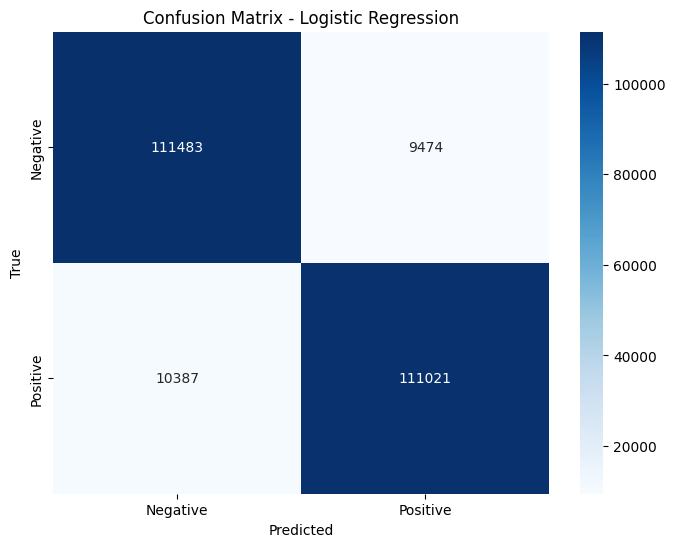

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the TF-IDF vectors
logreg.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test_tfidf)

# Print classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

### **2. Naive Bayes**

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    120957
           1       0.83      0.84      0.84    121408

    accuracy                           0.83    242365
   macro avg       0.83      0.83      0.83    242365
weighted avg       0.83      0.83      0.83    242365



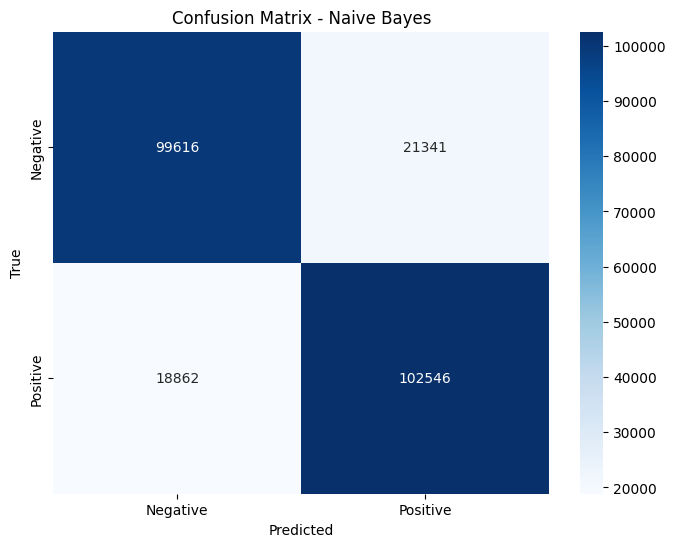

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Train the model on the TF-IDF vectors
nb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb = nb.predict(X_test_tfidf)

# Print classification report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')